In [2]:
import pandas as pd
import numpy as np
import torch
# dataloader
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

import sys
sys.path.append('../sys_model/')

from sys_model_dataset import  SysModelDataset

# Import pytorch_lightning model
import pytorch_lightning as pl
from system_model import SysModel

# make jupytre relode modules when they change
%load_ext autoreload
%autoreload 2

# Load dataset

In [8]:
# csv file path
sys_model_df = pd.read_csv('../../../../misc/recorded_data/tick_based_100hz_23-02-19.csv')

In [9]:
# Create dataset
sys_model_dataset = SysModelDataset(
    df=sys_model_df,
    num_time_steps_before=30,
    num_time_steps_after=1,
)


# sys model

In [10]:
# load model
sys_model = SysModel(
    num_past_time_steps = 30,
    num_input_vars = 2,
    num_output_vars = 1,
    num_internal_vars = 4,
)
sys_model.load_state_dict(torch.load('../sys_model/sys_model_2023-02-22_15-19-49.pt'))

<All keys matched successfully>

# Generation of ctrl model dataset

In [11]:
ar_dataset = SysModelDataset(
    df=sys_model_df,
    num_time_steps_before=30,
    num_time_steps_after=100
)

In [12]:
# Create dataloader
ar_dataloader = DataLoader(ar_dataset, batch_size=1, shuffle=True, num_workers=8)

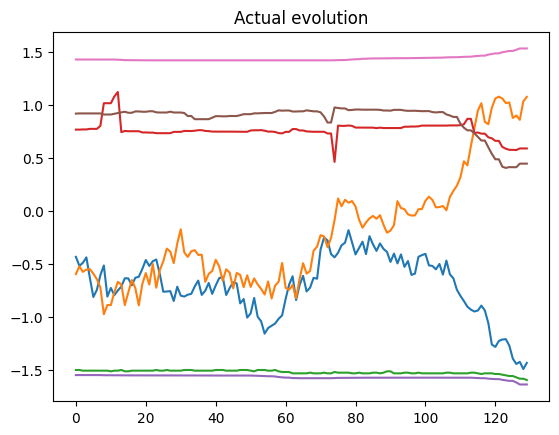

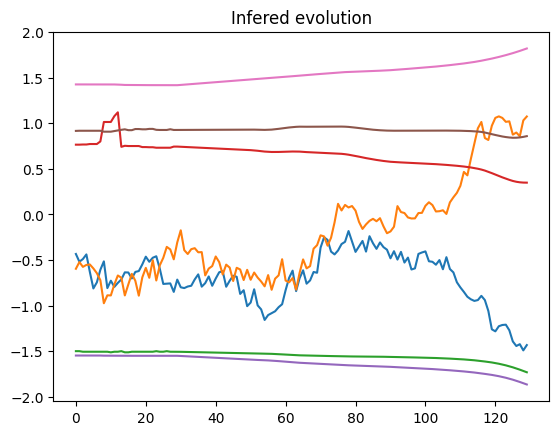

In [30]:
# Get a batch
past_inputs, past_outputs, past_interals, future_inputs, future_outputs, future_interals = next(iter(ar_dataloader))

inputs = torch.cat((past_inputs, future_inputs), dim=2)
outputs = torch.cat((past_outputs, future_outputs), dim=2)
interals = torch.cat((past_interals, future_interals), dim=2)


# Plot base truth
for i in range(inputs.shape[1]):
    plt.plot(inputs[0, i, :].numpy())
for i in range(outputs.shape[1]):
    plt.plot(outputs[0, i, :].numpy())
for i in range(interals.shape[1]):
    plt.plot(interals[0, i, :].numpy())
plt.title('Actual evolution')
plt.show()

# Plot infered evolution
window_size = 30
sys_model.eval()
outputs_predicted = outputs.clone()
interals_predicted = interals.clone()
for i in range(0, inputs.shape[2]- window_size):
    # concatenate past and future to get the model input

    next_predicted_output, next_predicted_internal = sys_model(inputs[:, :, i:i+window_size], outputs_predicted[:, :, i:i+window_size], interals_predicted[:, :, i:i+window_size])
    outputs_predicted[:, :, i+window_size] = next_predicted_output[:,:,0]
    interals_predicted[:, :, i+window_size] = next_predicted_internal[:,:,0]

for i in range(inputs.shape[1]):
    plt.plot(inputs[0, i, :].numpy())
for i in range(outputs_predicted.shape[1]):
    plt.plot(outputs_predicted[0, i, :].detach().numpy())
for i in range(interals_predicted.shape[1]):
    plt.plot(interals_predicted[0, i, :].detach().numpy())
plt.title('Infered evolution')
plt.show()
# Add title


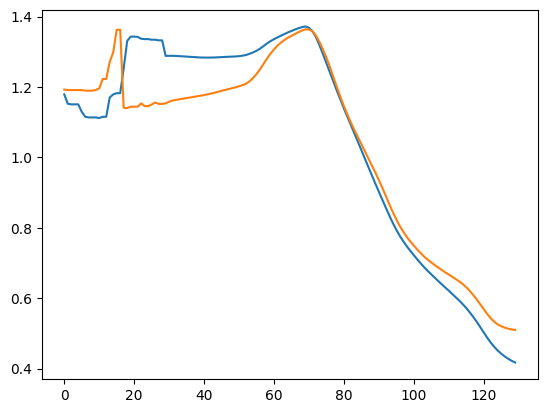

In [24]:
for i in [0, 2]:
    plt.plot(interals_predicted[0, i, :].detach().numpy())

In [14]:
# Createa function that calculates how well the system evolved based on a given input
past_inputs, past_outputs, past_interals, future_inputs, future_outputs, future_interals = next(iter(ar_dataloader))

inputs = torch.cat((past_inputs, future_inputs), dim=2)
outputs = torch.cat((past_outputs, future_outputs), dim=2)
interals = torch.cat((past_interals, future_interals), dim=2)

In [19]:

internal_channel_means = [-2.0340237e+03,  6.3358569e-01, -2.1668540e+03,  1.4289156e+01]
internal_channel_stds = [1.1323308e+03, 1.1938887e+00, 1.2715853e+03, 1.0630209e+00]

In [26]:
optimal_torque_encoder_value = (-900 - (-2.0340237e+03)) / 1.1323308e+03


1.0014950578046626

In [27]:
"""
# Extract data
past_inputs = df.iloc[:self.num_time_steps_before][[
    'flex_myobrick_pwm', 
    'extend_myobrick_pwm'
]].to_numpy().astype(np.float32)
past_outputs = df.iloc[:self.num_time_steps_before][
    'angle'
].to_numpy().astype(np.float32)
past_interals = df.iloc[:self.num_time_steps_before][[
    'flex_myobrick_torque_encoder',
    'flex_myobrick_pos_encoder',
    'extend_myobrick_torque_encoder',
    'extend_myobrick_pos_encoder'
]].to_numpy().astype(np.float32)

future_outputs = df.iloc[self.num_time_steps_before:self.num_time_steps_before+self.num_time_steps_after][
    'angle'
].to_numpy().astype(np.float32)
future_inputs = df.iloc[self.num_time_steps_before:self.num_time_steps_before+self.num_time_steps_after][[
    'flex_myobrick_pwm',
    'extend_myobrick_pwm'
]].to_numpy().astype(np.float32)
future_interals = df.iloc[self.num_time_steps_before:self.num_time_steps_before+self.num_time_steps_after][[
    'flex_myobrick_torque_encoder',
    'flex_myobrick_pos_encoder',
    'extend_myobrick_torque_encoder',
    'extend_myobrick_pos_encoder'
]].to_numpy().astype(np.float32)
"""

"\n# Extract data\npast_inputs = df.iloc[:self.num_time_steps_before][[\n    'flex_myobrick_pwm', \n    'extend_myobrick_pwm'\n]].to_numpy().astype(np.float32)\npast_outputs = df.iloc[:self.num_time_steps_before][\n    'angle'\n].to_numpy().astype(np.float32)\npast_interals = df.iloc[:self.num_time_steps_before][[\n    'flex_myobrick_torque_encoder',\n    'flex_myobrick_pos_encoder',\n    'extend_myobrick_torque_encoder',\n    'extend_myobrick_pos_encoder'\n]].to_numpy().astype(np.float32)\n\nfuture_outputs = df.iloc[self.num_time_steps_before:self.num_time_steps_before+self.num_time_steps_after][\n    'angle'\n].to_numpy().astype(np.float32)\nfuture_inputs = df.iloc[self.num_time_steps_before:self.num_time_steps_before+self.num_time_steps_after][[\n    'flex_myobrick_pwm',\n    'extend_myobrick_pwm'\n]].to_numpy().astype(np.float32)\nfuture_interals = df.iloc[self.num_time_steps_before:self.num_time_steps_before+self.num_time_steps_after][[\n    'flex_myobrick_torque_encoder',\n    'f

In [31]:
flex_myobrick_pwm = inputs[0, 0, :].numpy()
extend_myobrick_pwm = inputs[0, 1, :].numpy()
angle = outputs[0, 0, :].numpy()
flex_myobrick_torque_encoder = interals[0, 0, :].numpy()
flex_myobrick_pos_encoder = interals[0, 1, :].numpy()
extend_myobrick_torque_encoder = interals[0, 2, :].numpy()
extend_myobrick_pos_encoder = interals[0, 3, :].numpy()

In [56]:
infered_angle = outputs_predicted[0, 0, :].detach().numpy()
infered_flex_myobrick_torque_encoder = interals_predicted[0, 0, :].detach().numpy()
infered_flex_myobrick_pos_encoder = interals_predicted[0, 1, :].detach().numpy()
infered_extend_myobrick_torque_encoder = interals_predicted[0, 2, :].detach().numpy()
infered_extend_myobrick_pos_encoder = interals_predicted[0, 3, :].detach().numpy()

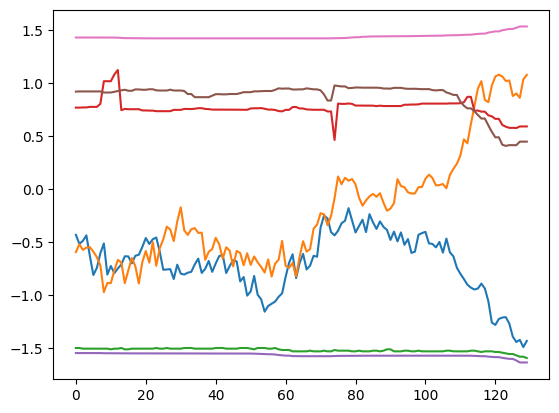

In [58]:
# Plot
plt.plot(flex_myobrick_pwm)
plt.plot(extend_myobrick_pwm)
plt.plot(angle)
plt.plot(flex_myobrick_torque_encoder)
plt.plot(flex_myobrick_pos_encoder)
plt.plot(extend_myobrick_torque_encoder)
plt.plot(extend_myobrick_pos_encoder)
plt.show()

In [54]:

# The controller should be encuraged to keep the torque encoder values always above the optimal value but as close as possible to it
def torque_encoder_cost(torque_encoder_value):
    if torque_encoder_value > optimal_torque_encoder_value:
        cost = (torque_encoder_value - optimal_torque_encoder_value) ** 2
    else:
        # linear penalty
        cost = abs(torque_encoder_value - optimal_torque_encoder_value) * 0.05
    return cost

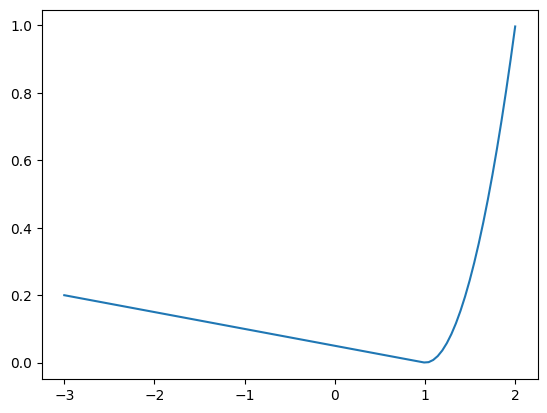

In [55]:
# plot cost from -2 to 2
x = np.linspace(-3, 2, 100)
y = [torque_encoder_cost(i) for i in x]
plt.plot(x, y)

In [60]:
# mean cost
flex_torque_cost = np.mean([torque_encoder_cost(i) for i in flex_myobrick_torque_encoder])

In [61]:
extend_torque_cost = np.mean([torque_encoder_cost(i) for i in extend_myobrick_torque_encoder])

In [62]:
angle_cost = np.mean((angle - infered_angle) ** 2)

In [63]:
total_cost = flex_torque_cost + extend_torque_cost + angle_cost

In [68]:
total_cost

0.02086403890577685

In [67]:
angle_cost

0.0019742292